# Lung Cancer Prediction Convolutional Neural Network

### Importing the libraries

In [12]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 343 images belonging to 2 classes.


### Preprocessing the Test set

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 112 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [15]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64,3]))

### Step 2 - Pooling

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [19]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [20]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [21]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN and Train the CNN Model

In [22]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)


Epoch 1/30


11/11 [==============================] - 7s 447ms/step - loss: 0.7738 - accuracy: 0.5510 - val_loss: 0.6817 - val_accuracy: 0.6429
Epoch 2/30
11/11 [==============================] - 4s 390ms/step - loss: 0.6628 - accuracy: 0.6618 - val_loss: 0.6016 - val_accuracy: 0.4375
Epoch 3/30
11/11 [==============================] - 4s 380ms/step - loss: 0.5838 - accuracy: 0.6939 - val_loss: 0.4721 - val_accuracy: 0.7768
Epoch 4/30
11/11 [==============================] - 4s 379ms/step - loss: 0.4649 - accuracy: 0.8105 - val_loss: 0.3028 - val_accuracy: 0.8750
Epoch 5/30
11/11 [==============================] - 4s 375ms/step - loss: 0.3411 - accuracy: 0.8513 - val_loss: 0.1574 - val_accuracy: 0.9554
Epoch 6/30
11/11 [==============================] - 4s 373ms/step - loss: 0.2200 - accuracy: 0.9038 - val_loss: 0.1127 - val_accuracy: 0.9821
Epoch 7/30
11/11 [==============================] - 4s 367ms/step - loss: 0.2036 - accuracy: 0.9300 - val_loss: 0.0745 - val_accuracy: 0.9911
Epoch 8/30
11/11 

## Part 4 - Making a single prediction

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image = load_img('dataset/single_prediction/cancer (2).png', target_size=(64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = cnn.predict(test_image)

class_indices = {0: 'Cancer', 1: 'Normal'}

predicted_class = class_indices[int(result[0][0])]

1/1 [==============================] - 0s 247ms/step


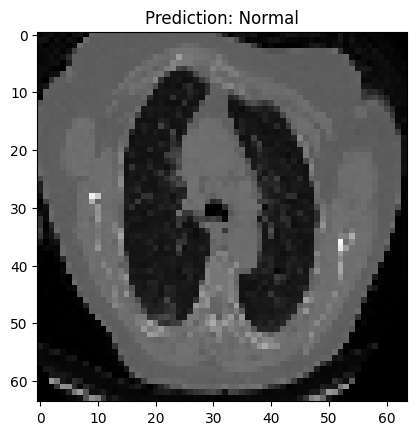

In [24]:
# Display the image with the predicted class
plt.imshow(test_image[0] / 255.0)
plt.title(f'Prediction: {predicted_class}')
plt.show()